In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification


In [ ]:
mapping = {
    "kan": "Kansas City Chiefs",
    "phi": "Philadelphia Eagles",
    "atl": "Atlanta Falcons",
    "buf": "Buffalo Bills",
    "nor": "New Orleans Saints",
    "chi": "Chicago Bears",
    "cin": "Cincinnati Bengals",
    "clt": "Indianapolis Colts",
    "mia": "Miami Dolphins",
    "nyg": "New York Giants",
    "sea": "Seattle Seahawks",
    "sdg": "Los Angeles Chargers",
    "cle": "Cleveland Browns",
    "tam": "Tampa Bay Buccaneers",
    "det": "Detroit Lions",
    "sfo": "San Francisco 49ers",
    "car": "Carolina Panthers",
    "jax": "Jacksonville Jaguars",
    "gnb": "Green Bay Packers",
    "dal": "Dallas Cowboys",
    "min": "Minnesota Vikings",
    "nwe": "New England Patriots",
    "was": "Washington Commanders",
    "oti": "Tennessee Titans",
    "rav": "Baltimore Ravens",
    "crd": "Arizona Cardinals",
    "den": "Denver Broncos",
    "htx": "Houston Texans",
    "nyj": "New York Jets",
    "pit": "Pittsburgh Steelers",
    "rai": "Las Vegas Raiders",
    "ram": "Los Angeles Rams"
}

In [ ]:
# home and away were flipped on the original dataset
column_names = ['id', 'winner', 'loser', 'winner_score', 'loser_score', 'home_team_first_downs', 'away_team_first_downs', 'home_team_rushes', 'home_team_rushing_yds', 'home_team_rushing_tds', 'away_team_rushes', 'away_team_rushing_yds', 'away_team_rushing_tds', 'home_team_completions', 'home_team_pass_attempts', 'home_team_pass_yds', 'home_team_pass_tds', 'home_team_ints', 'away_team_completions', 'away_team_pass_attempts', 'away_team_pass_yds', 'away_team_pass_tds', 'away_team_ints', 'home_team_sacks', 'home_team_sack_yds', 'away_team_sacks', 'away_team_sack_yds', 'home_team_net_pass_yds', 'away_team_net_pass_yds', 'home_team_total_yds', 'away_team_total_yds', 'home_team_fumbles', 'home_team_fumbles_lost', 'away_team_fumbles', 'away_team_fumbles_lost', 'home_team_turnovers', 'away_team_turnovers', 'home_team_penalties', 'home_team_penalty_yds', 'away_team_penalties', 'away_team_penalty_yds', 'home_team_third_down_conversions', 'home_team_third_down_attempts', 'away_team_third_down_conversions', 'away_team_third_down_attempts', 'home_team_fourth_down_conversions', 'home_team_fourth_down_attempts', 'away_team_fourth_down_conversions', 'away_team_fourth_down_attempts', 'home_team_possession_time', 'away_team_possession_time']
table = pd.read_csv("boxscore_data.csv", header = None, names = column_names)
table = table.drop(index=0)

# converting score columns to numeric
table['winner_score'] = pd.to_numeric(table['winner_score'], errors='coerce').fillna(0)
table['loser_score'] = pd.to_numeric(table['loser_score'], errors='coerce').fillna(0)
for col in table.columns:
  table[col] = table[col].fillna(0)

# adding/engineering new variables
table.insert(loc=4, column='won_by', value=table['winner_score'] - table['loser_score'])
table['home_team_won'] = table.apply(lambda x: mapping[x['id'][-3:]] == x['winner'], axis = 1).astype(int)
# table.insert(loc=4, column="home_team_won", )
table.head(50)

,id,winner,loser,winner_score,won_by,loser_score,home_team_first_downs,away_team_first_downs,home_team_rushes,home_team_rushing_yds,...,home_team_third_down_attempts,away_team_third_down_conversions,away_team_third_down_attempts,home_team_fourth_down_conversions,home_team_fourth_down_attempts,away_team_fourth_down_conversions,away_team_fourth_down_attempts,home_team_possession_time,away_team_possession_time,home_team_won
1,202409050kan,Kansas City Chiefs,Baltimore Ravens,27,7,20,21,25,20,72,...,9,7,14,0,0,1,2,26:17,33:43,1
2,202409060phi,Philadelphia Eagles,Green Bay Packers,34,5,29,25,19,38,144,...,14,3,11,1,1,1,1,32:47,27:13,1
3,202409080atl,Pittsburgh Steelers,Atlanta Falcons,18,8,10,15,16,22,89,...,9,8,17,1,1,0,1,24:24,35:36,0
4,202409080buf,Buffalo Bills,Arizona Cardinals,34,6,28,23,18,33,130,...,9,7,13,2,2,0,1,30:30,29:30,1
5,202409080nor,New Orleans Saints,Carolina Panthers,47,37,10,22,11,37,180,...,13,1,10,0,0,1,3,36:39,23:21,1
6,202409080chi,Chicago Bears,Tennessee Titans,24,7,17,11,16,22,84,...,13,3,14,2,2,1,2,25:06,34:54,1
7,202409080cin,New England Patriots,Cincinnati Bengals,16,6,10,13,17,16,70,...,11,6,15,0,1,0,0,25:57,34:03,0
8,202409080clt,Houston Texans,Indianapolis Colts,29,2,27,14,26,22,104,...,10,7,14,1,2,2,2,20:00,40:00,0
9,202409080mia,Miami Dolphins,Jacksonville Jaguars,20,3,17,18,17,25,81,...,16,2,10,0,2,0,1,33:10,26:50,1
10,202409080nyg,Minnesota Vikings,New York Giants,28,22,6,14,17,21,74,...,18,3,10,1,3,1,1,32:26,27:34,0


In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 1 to 285
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 285 non-null    object
 1   winner                             285 non-null    object
 2   loser                              285 non-null    object
 3   winner_score                       285 non-null    int64 
 4   won_by                             285 non-null    int64 
 5   loser_score                        285 non-null    int64 
 6   home_team_first_downs              285 non-null    object
 7   away_team_first_downs              285 non-null    object
 8   home_team_rushes                   285 non-null    object
 9   home_team_rushing_yds              285 non-null    object
 10  home_team_rushing_tds              285 non-null    object
 11  away_team_rushes                   285 non-null    object
 12  away_tea

In [ ]:
# removing highly correlating variables
a = table.drop(columns=['id', 'loser', 'winner_score', 'loser_score', 'away_team_possession_time', 'home_team_possession_time', 'won_by'], axis=1)
b = a.drop(columns=['winner'], axis=1)

correlation = b.corr().abs()
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
table_to_use = a.drop(to_drop, axis=1)
table_to_use.head()

,winner,home_team_first_downs,away_team_first_downs,home_team_rushes,home_team_rushing_tds,away_team_rushes,away_team_rushing_tds,home_team_completions,home_team_pass_tds,home_team_ints,...,away_team_sacks,home_team_fumbles,away_team_fumbles,home_team_penalties,away_team_penalties,home_team_third_down_conversions,away_team_third_down_conversions,home_team_fourth_down_conversions,away_team_fourth_down_conversions,home_team_won
1,Kansas City Chiefs,21,25,20,2,32,1,20,1,1,...,1,0,1,6,7,4,7,0,1,1
2,Philadelphia Eagles,25,19,38,2,21,1,20,2,2,...,2,2,1,7,10,4,3,1,1,1
3,Pittsburgh Steelers,15,16,22,0,41,0,16,1,2,...,2,1,1,5,9,2,8,1,0,0
4,Buffalo Bills,23,18,33,2,25,1,18,2,0,...,4,1,1,9,5,3,7,2,0,1
5,New Orleans Saints,22,11,37,2,20,1,19,3,0,...,4,1,1,10,6,7,1,0,1,1


(228, 22)
(228,)
(57, 22)
(57,)


/tmp/ipython-input-2188439634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = x[col].astype(float)
/tmp/ipython-input-2188439634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = x[col].astype(float)
/tmp/ipython-input-2188439634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

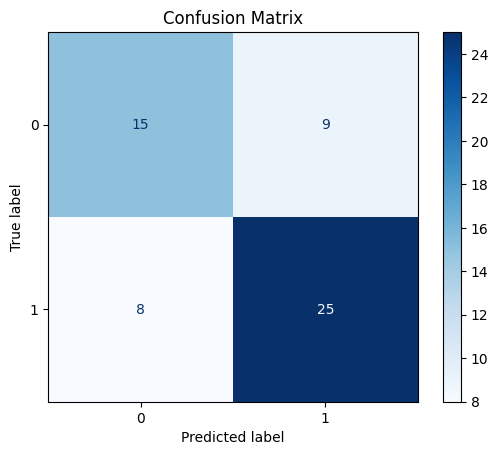

Confusion Matrix Array:
[[15  9]
 [ 8 25]]
Accuracy: 0.7017543859649122


In [ ]:
# attempt to make a decision tree
d = table_to_use.drop(columns=['winner', 'home_team_won'], axis=1)
feature_cols = d.columns.tolist()

x = table_to_use[feature_cols]
y = table_to_use.home_team_won

for col in x.columns:
  x[col] = x[col].astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
y_predclf = clf.predict(x_test)

cm = confusion_matrix(y_test, y_predclf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix Array:")
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_predclf))


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 1 to 285
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   home_team_first_downs              285 non-null    float64
 1   away_team_first_downs              285 non-null    float64
 2   home_team_rushes                   285 non-null    float64
 3   home_team_rushing_tds              285 non-null    float64
 4   away_team_rushes                   285 non-null    float64
 5   away_team_rushing_tds              285 non-null    float64
 6   home_team_completions              285 non-null    float64
 7   home_team_pass_tds                 285 non-null    float64
 8   home_team_ints                     285 non-null    float64
 9   away_team_completions              285 non-null    float64
 10  away_team_pass_tds                 285 non-null    float64
 11  away_team_ints                     285 non-null    float64

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


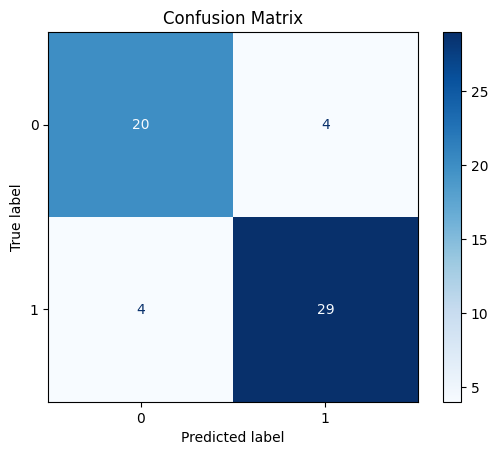

Feature Importance based on Logistic Regression Coefficients: 
                              Feature  Coefficient
3               home_team_rushing_tds     1.127596
7                  home_team_pass_tds     1.031856
21  away_team_fourth_down_conversions     0.664242
15                  away_team_fumbles     0.538842
11                     away_team_ints     0.367353
17                away_team_penalties     0.311991
1               away_team_first_downs     0.213102
2                    home_team_rushes     0.115050
13                    away_team_sacks     0.081454
6               home_team_completions     0.067821
0               home_team_first_downs     0.016356
19   away_team_third_down_conversions    -0.005546
16                home_team_penalties    -0.042232
18   home_team_third_down_conversions    -0.074343
9               away_team_completions    -0.173413
12                    home_team_sacks    -0.203321
4                    away_team_rushes    -0.233846
20  home_team_fourt

In [ ]:
logreg = LogisticRegression(random_state=16)
logreg.fit(x_train, y_train)

y_predlr = logreg.predict(x_test)

cm = confusion_matrix(y_test, y_predlr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance based on Logistic Regression Coefficients: ")
print(feature_importance)

print("Confusion Matrix Array:")
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_predlr))

results = pd.DataFrame({
        'actual': y_test,
        'predicted': y_predlr,
        'correct': y_test == y_predlr
})

# Add features
results = pd.concat([results, pd.DataFrame(x_test, columns=feature_cols)], axis=1)

# Get misclassified games
misclassified = results[~results['correct']]

print(f"Total misclassified games: {len(misclassified)}")
print(f"Misclassification rate: {len(misclassified)/len(results):.2%}")

# First, let's enhance the analysis with prediction probabilities
y_pred_proba = logreg.predict_proba(x_test)[:, 1]

# Update results with probabilities
results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_predlr,
    'prediction_prob': y_pred_proba,
    'correct': y_test == y_predlr
})

# Add features
results = pd.concat([results, pd.DataFrame(x_test, columns=feature_cols)], axis=1)
results = results.reset_index(drop=True)

# Get misclassified games with detailed analysis
misclassified = results[~results['correct']]
print(f"Total misclassified games: {len(misclassified)}")

# Analyze each misclassified game
for i, (idx, game) in enumerate(misclassified.iterrows(), 1):
    print(f"\n=== Misclassified Game {i} ===")
    print(f"Actual: {game['actual']}, Predicted: {game['predicted']}")
    print(f"Prediction confidence: {game['prediction_prob']:.3f}")

    # Get top 3 features that contributed most to this prediction
    feature_contributions = []
    for feature in feature_cols:
        contribution = game[feature] * feature_importance[feature_importance['Feature'] == feature]['Coefficient'].values[0]
        feature_contributions.append((feature, contribution))

    # Sort by absolute contribution
    feature_contributions.sort(key=lambda x: abs(x[1]), reverse=True)

    print("Top contributing features:")
    for feature, contrib in feature_contributions[:3]:
        print(f"  {feature}: {contrib:.4f} (value: {game[feature]:.3f})")

    # Check if key features had extreme values
    extreme_features = []
    for feature in feature_cols:
        feature_mean = x_train[feature].mean()
        feature_std = x_train[feature].std()
        if abs(game[feature] - feature_mean) > 2 * feature_std:
            extreme_features.append((feature, game[feature], feature_mean))

    if extreme_features:
        print("Extreme feature values:")
        for feature, value, mean in extreme_features[:2]:
            print(f"  {feature}: {value:.3f} (mean: {mean:.3f})")

# Analyze patterns across all misclassifications
print("\n=== OVERALL PATTERNS ===")
print(f"Average prediction confidence: {misclassified['prediction_prob'].mean():.3f}")
print(f"Games where model was very confident but wrong (prob > 0.7): {len(misclassified[misclassified['prediction_prob'] > 0.7])}")
print(f"Games where model was uncertain but wrong (prob between 0.4-0.6): {len(misclassified[(misclassified['prediction_prob'] >= 0.4) & (misclassified['prediction_prob'] <= 0.6)])}")





In [ ]:
misclassified.index
table.loc[misclassified.index,:]

,id,winner,loser,winner_score,won_by,loser_score,home_team_first_downs,away_team_first_downs,home_team_rushes,home_team_rushing_yds,...,home_team_third_down_attempts,away_team_third_down_conversions,away_team_third_down_attempts,home_team_fourth_down_conversions,home_team_fourth_down_attempts,away_team_fourth_down_conversions,away_team_fourth_down_attempts,home_team_possession_time,away_team_possession_time,home_team_won
4,202409080buf,Buffalo Bills,Arizona Cardinals,34,6,28,23,18,33,130,...,9,7,13,2,2,0,1,30:30,29:30,1
6,202409080chi,Chicago Bears,Tennessee Titans,24,7,17,11,16,22,84,...,13,3,14,2,2,1,2,25:06,34:54,1
13,202409080cle,Dallas Cowboys,Cleveland Browns,33,16,17,15,15,19,93,...,15,4,14,3,5,0,0,30:54,29:06,0
27,202409150rav,Las Vegas Raiders,Baltimore Ravens,26,3,23,21,18,27,151,...,11,4,12,1,1,0,1,29:17,30:43,0
29,202409150kan,Kansas City Chiefs,Cincinnati Bengals,26,1,25,19,18,32,149,...,8,4,13,2,2,2,2,28:31,31:29,1
32,202409160phi,Atlanta Falcons,Philadelphia Eagles,22,1,21,22,22,37,186,...,13,2,9,2,3,1,2,35:39,24:21,0
49,202409260nyg,Dallas Cowboys,New York Giants,20,5,15,16,14,24,26,...,16,3,10,3,4,1,1,35:37,24:23,0
55,202409290gnb,Minnesota Vikings,Green Bay Packers,31,2,29,24,22,19,86,...,12,4,11,0,2,0,1,27:45,32:15,0


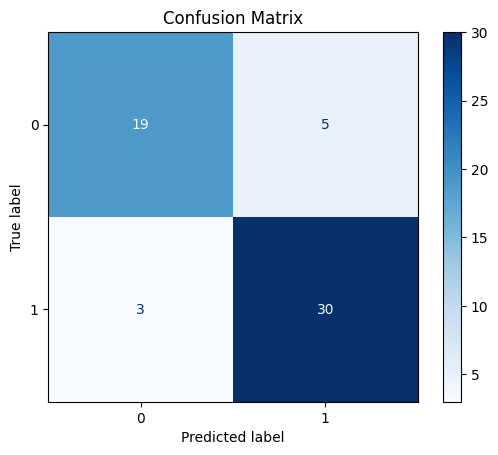

Confusion Matrix Array:
[[19  5]
 [ 3 30]]
Accuracy: 0.8596491228070176


In [ ]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(x_train, y_train)
y_predsvm = clf2.predict(x_test)

cm = confusion_matrix(y_test, y_predsvm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf2.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix Array:")
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_predsvm))

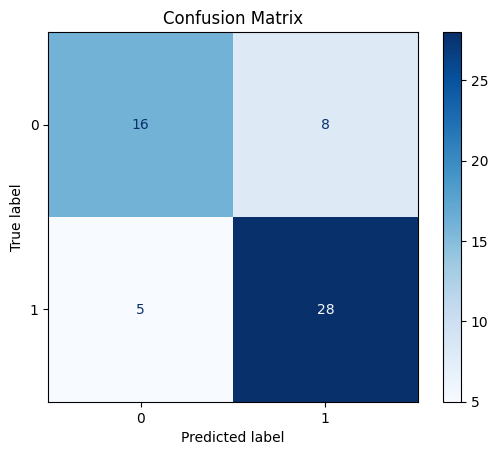

Confusion Matrix Array:
[[16  8]
 [ 5 28]]
Accuracy: 0.7719298245614035


In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 16)
rf.fit(x_train, y_train)
y_predrf = rf.predict(x_test)

cm = confusion_matrix(y_test, y_predrf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix Array:")
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_predrf))

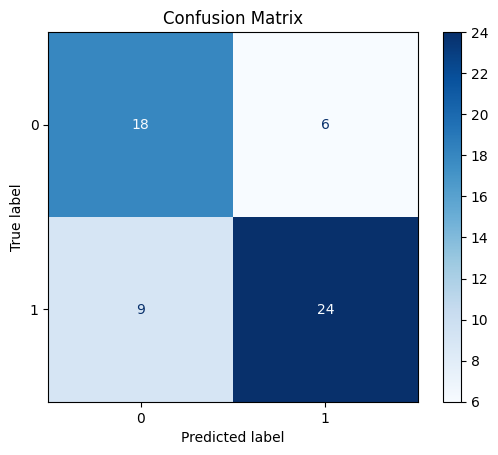

Confusion Matrix Array:
[[18  6]
 [ 9 24]]
Accuracy: 0.7368421052631579


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)

cm = confusion_matrix(y_test, y_predknn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix Array:")
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_predknn))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validation accuracy: 0.8416


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:10:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


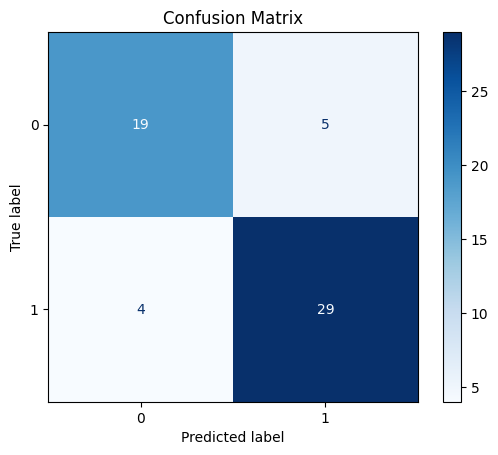

Confusion Matrix Array:
[[19  5]
 [ 4 29]]
Accuracy: 0.8421052631578947


In [ ]:
xgb = XGBClassifier(enable_categorical=True, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_xgb = grid_search.best_estimator_
y_predxgb = best_xgb.predict(x_test)

cm = confusion_matrix(y_test, y_predxgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix Array:")
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_predxgb))